## Linear model using Scikit-Learn

In [28]:
#Import Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [3]:
#Import datasets
oecd_bli = pd.read_csv('dataset/better_life/BLI_25082018120323618.csv', thousands=',')
gdp_per_cap = pd.read_csv('dataset/better_life/WEO_Data.csv', thousands=',', encoding='latin1')

In [4]:
#Display the contents of the dataframe
gdp_per_cap[:5]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [5]:
#check if there are columns with NA
gdp_per_cap.count()

Country                          190
Subject Descriptor               189
Units                            189
Scale                            189
Country/Series-specific Notes    188
2015                             187
Estimates Start After            188
dtype: int64

In [6]:
#Check which which row has the missing column value 
gdp_per_cap[gdp_per_cap['2015'].isnull()]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
88,Kosovo,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,NaN,NaN
163,Syria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,2010.0
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop all rows that contain null values
gdp = gdp_per_cap.dropna()
gdp.count()

Country                          187
Subject Descriptor               187
Units                            187
Scale                            187
Country/Series-specific Notes    187
2015                             187
Estimates Start After            187
dtype: int64

In [8]:
gdp.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [9]:
#Copy only the columns needed
gdp = gdp[['Country', '2015']]
gdp[:5]

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.380
2,Algeria,4318.140
3,Angola,4100.320
4,Antigua and Barbuda,14414.300


In [10]:
gdp.count()

Country    187
2015       187
dtype: int64

In [11]:
#Display the contents of the dataframe
oecd_bli[:5]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [12]:
#show the Dataframe columns
oecd_bli.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [13]:
#Display unique values of the column
oecd_bli.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Feeling safe walking alone at night',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Voter turnout', 'Life expectancy',
       'Self-reported health', 'Life satisfaction', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [14]:
#We Only filter for values of Life Satisfaction
oecd_bli = oecd_bli.loc[oecd_bli['Indicator']=='Life satisfaction']

In [15]:
o_df = oecd_bli.groupby(['Country', 'Indicator'])['Value'].mean().reset_index()

In [16]:
o_df = o_df.loc[o_df['Indicator']=='Life satisfaction']

In [17]:
o_df = o_df[['Country', 'Value']].reset_index(drop=True)
o_df[:5]

,Country,Value
0,Australia,7.32
1,Austria,7.08
2,Belgium,7.00
3,Brazil,6.60
4,Canada,7.28


### Merge the Dataframes

In [18]:
#Merge using Full-outer Joint
country_stats =pd.merge(o_df, gdp,how='outer', on='Country')

In [19]:
#Display the Merge Data
country_stats[:5]

,Country,Value,2015
0,Australia,7.32,50961.87
1,Austria,7.08,43724.03
2,Belgium,7.00,40106.63
3,Brazil,6.60,8670.00
4,Canada,7.28,43331.96


In [20]:
#Check which which row has the missing column value 
c_stats = country_stats.dropna()

In [21]:
c_stats.count()

Country    38
Value      38
2015       38
dtype: int64

In [22]:
#Check which which row has the missing column value 
c_stats.to_csv('dataset/better_life/cleaned_country_stats.csv')

In [23]:
# Rename several DataFrame columns
c_stats = c_stats.rename(columns = {
    'Value':'Life satisfaction',
    '2015':'GDP per capita',
})

In [24]:
c_stats[:5]

,Country,Life satisfaction,GDP per capita
0,Australia,7.32,50961.87
1,Austria,7.08,43724.03
2,Belgium,7.00,40106.63
3,Brazil,6.60,8670.00
4,Canada,7.28,43331.96


In [25]:
# Prepare the data
X = np.c_[c_stats['GDP per capita']]
y = np.c_[c_stats['Life satisfaction']]

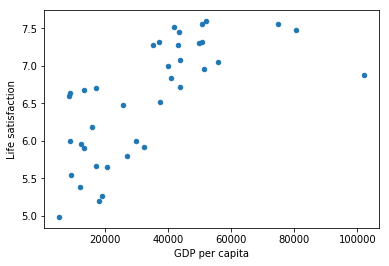

In [26]:
# Visualize the data
c_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [29]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [30]:
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita 
print(lin_reg_model.predict(X_new))

[[6.27873152]]
